In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("C:/Users/kriti/Downloads/spam.csv",encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , inplace= True)

In [6]:
df.rename(columns= { 'v1' : 'result','v2' : 'content'}, inplace=True)

In [7]:
df

,result,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
#Label Encoder
encoder = LabelEncoder()

In [9]:
df['answer']= encoder.fit_transform( df['result'])

In [10]:
df

,result,content,answer
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [11]:
df.drop(columns = ['result'], inplace = True)

In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(inplace= True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

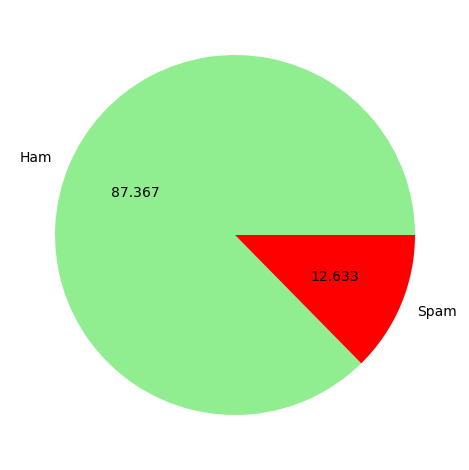

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['answer'].value_counts() ,labels= ['Ham','Spam'],autopct  = '%0.3f',	colors= ['lightgreen', 'r' ])
plt.tight_layout()

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
from nltk.stem import WordNetLemmatizer

In [19]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
df

,content,answer
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [21]:
lemmatizer = WordNetLemmatizer()

In [22]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()
def transform_text(text):
    stop_words = set(stopwords.words('english')) 
    text =text.lower()
    text = nltk.word_tokenize(text)
    pure_text = [word for word in text if word.isalnum()] 
    final_text = [word for word in pure_text if word not in stop_words and word not in string.punctuation]
    return ' '.join(final_text)

df['content'] = df['content'].apply(transform_text)

In [23]:
def lemmatization(text):
    tokens = word_tokenize(text)
    lem_tok = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(lem_tok)

df['content']= df['content'].apply(lemmatization)

In [24]:
df['chars']= df['content'].apply(len)
df['words'] = df['content'].apply(lambda x:len( nltk.word_tokenize(x)))


In [25]:
df[df['answer']==0][['chars','words']].max()

chars    397
words     74
dtype: int64

In [26]:
df[df['answer']==0][['chars','words']].mean()

chars    41.957706
words     7.839681
dtype: float64

In [27]:
df[df['answer']==1][['chars','words']].max()

chars    143
words     28
dtype: int64

In [28]:
df[df['answer']==1][['chars','words']].mean()

chars    90.980092
words    15.220521
dtype: float64

In [29]:
df

,content,answer,chars,words
0,go jurong point crazy available bugis n great ...,0,82,16
1,ok lar joking wif u oni,0,23,6
2,free entry 2 wkly comp win fa cup final tkts 2...,1,129,24
3,u dun say early hor u c already say,0,35,9
4,nah think go usf life around though,0,35,7
...,...,...,...,...
5567,2nd time tried 2 contact u pound prize 2 claim...,1,89,17
5568,b going esplanade fr home,0,25,5
5569,pity mood suggestion,0,20,3
5570,guy bitching acted like interested buying some...,0,78,13


In [30]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymore tonight k cried enough today'

In [31]:
ham_words= []
for i in df[df['answer']==0]['content'].tolist():
    for j in i.split():
        ham_words.append(j)
        


In [32]:
from collections import Counter 
common_ham = pd.DataFrame(Counter(ham_words).most_common(30))

In [33]:
common_ham

,0,1
0,u,935
1,get,304
2,gt,288
3,lt,287
4,2,284
5,go,267
6,got,236
7,know,233
8,come,226
9,like,224


In [34]:
spam_words= []
for i in df[df['answer']==1]['content'].tolist():
    for j in i.split():
        spam_words.append(j)
        

In [35]:
common_spam = pd.DataFrame(Counter(ham_words).most_common(30))

In [36]:
common_spam 

,0,1
0,u,935
1,get,304
2,gt,288
3,lt,287
4,2,284
5,go,267
6,got,236
7,know,233
8,come,226
9,like,224


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [38]:
x= tf.fit_transform(df['content']).toarray()

In [39]:
y = df['answer'].values

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [41]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [90]:
from sklearn.metrics import accuracy_score , classification_report
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.960348162475822
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034

